## Демонстрация теоремы Котельникова

Цифровая (относительная,
нормированная) частота. Формально такая частота определяется как
отношение реальной частоты к частоте дискретизации:
$f_0 = F_0/F_д,$ где $F_д = 1/T$ - частота дискретизации,
T – интервал между отчетами сигнала.
Значение  $1/F_0$ точности
соответствует числу точек на период для гармонического сигнала.



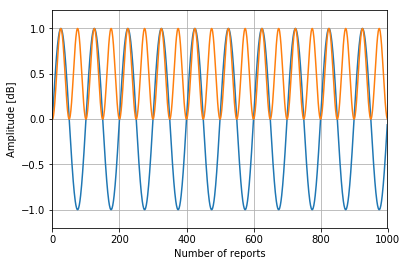

In [19]:
import numpy as np
import math 
import matplotlib.pyplot as plt

#число периодов на отрезке
P1 = 10
P2 = 990
#количество точек на графике
N = 1000
k1 = P1/N
k2 = P2/N
#пустые массивы значений
X = np.array([]) 
Y = np.array([])
Z = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонических сигналов
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k1))
    Y = np.append(Y, math.sin(2*math.pi*w2*t*k2))
    

plt.plot(X)
plt.plot(Y*Y)
# plt.plot(X+X)
plt.xlabel('Number of reports')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

# plt.plot(X)
# plt.plot(Y*Y)
# plt.grid(True, color='w', linestyle='-', linewidth=2)
# # plt.gca().patch.set_facecolor('0.8')
# plt.show()

## Спектры синусоидального сигнала
Обычно рассматривают амплитудный, фазовый и
энергетический спектры. Мы остановимся на первом и последнем. Энергетический получается возведением в квадрат амплитудного. В случе цифровых сигналов, спектр получают, используя дискретное преобразование
Фурье (или оптимизированный алгоритм быстрого преобразования Фурье).

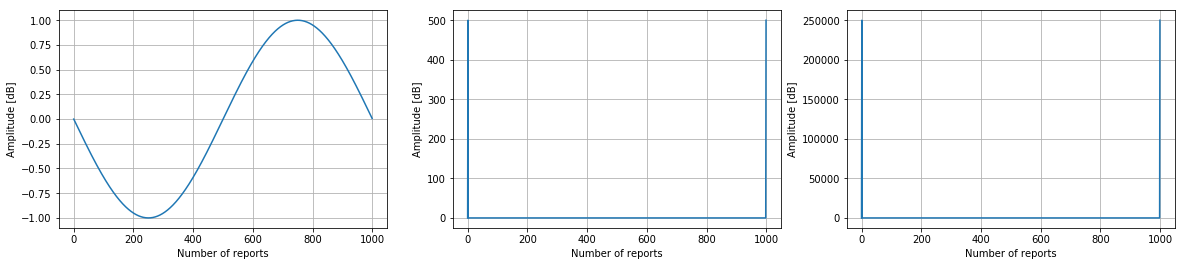

In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 999
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонического сигнала
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

S = np.fft.fft(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,4))

ax1.plot(X)
ax1.set_xlabel('Number of reports')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(abs(S))
ax2.set_xlabel('Number of reports')
ax2.set_ylabel('Amplitude [dB]')
ax2.grid(which='both', axis='both')

ax3.plot(abs(S)**2)
ax3.set_xlabel('Number of reports')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')


## Импульсная и частотная характеристики цифровых фильтров.
Под цифровым фильтром мы будет понимать дискретную систему с постоянными параметрами, причем ограничимся линейными системами. В таком случае система будет описываться уравнением
$y(n) = -\sum_{k=1}^N a(k)y(n-k)+\sum_{k=0}^M b(k)x(n-k)$

Где x (n) – отсчеты входного сигнала,

y(n)- отсчеты сигнала на выходе системы,

a(k), b(k) – коэффициенты фильтра,

N и M+1 – количество параметров a(k), b(k) соответственно. 

Максимальное число из N и M называется порядком фильтра.

Использование функции **scipy.signal.iirdesign**:

Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:

Lowpass: wp = 0.2, ws = 0.3
Highpass: wp = 0.3, ws = 0.2
Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

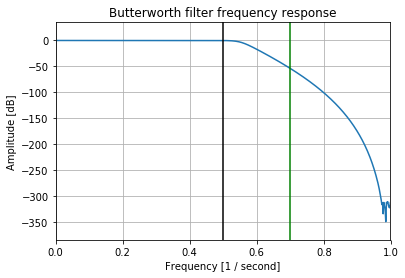

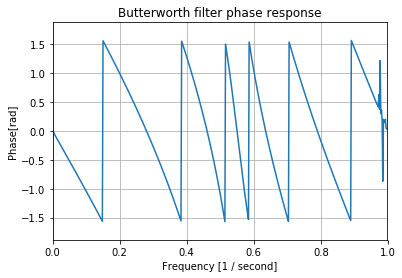

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
#частота пропускания и частота заграждения
wp, ws = 0.5, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

w=w/3.14
plt.plot(w, 20 * np.log10(abs(h)))

plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Butterworth filter phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

## Сумма и разность отсчетов как цифровые фильтры 
Генерируем синусоидальный сигнал. Для сумматора создаем массив с 9 нулями в начале.
Выполнение простейших манипуляций,
таких как сложение и вычитание соседних отсчетов, позволительно
рассматривать как простые системы, являющиеся цифровыми фильтрами. При
этом в зависимости от операции будут получаться фильтры разного типа. 

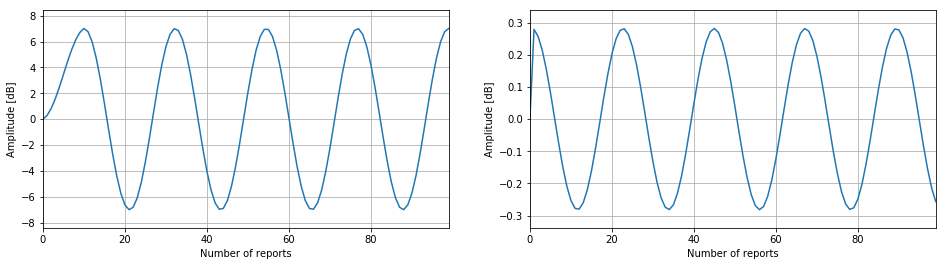

In [65]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

P = 4.5
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.zeros(9)
S = np.array([])
D = np.array([])
w1 = 1

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))
    
#суммирование последних 10 отчетов (предполагая,что до включения сигнала такое были нулевыми)     
for i in range(len(X)-9):
    S = np.append(S, sum(X[i:i+10]))

#вычитание двух последних
for i in range(len(X)-9):
    D = np.append(D,X[i+9]-X[i+8])
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(S)
ax1.set_xlabel('Number of reports')
ax1.set_ylabel('Amplitude [dB]')
ax1.margins(0, 0.1)
ax1.grid(which='both', axis='both')

plt.plot(D)
plt.xlabel('Number of reports')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()


## Сравнение селективности КИХ и БИХ фильтров.
Основная классификация цифровых фильтров происходит по
ограниченности импульсной характеристики: фильтры с конечной
импульсной характеристикой называют КИХ-фильтрами (FIR, они, как
правило, трансверсальные, т.е. не имеют обратной связи); в противовес им
фильтры с бесконечной импульсной характеристикой (БИХ, IIR) обладают
обратной связью и еще называются рекурсивными. Формальное отличие одних
от других в том, что коэффициенты a(k)≡0 для k=1,… N. Существует много
особенностей, характерных для фильтров каждого из перечисленных типов, но
в этом упражнении мы остановимся на одном отличии этих типов фильтровселективности АЧХ, т.е. способности лучше выделять спектральные
компоненты сигнала в определенной полосе частот.

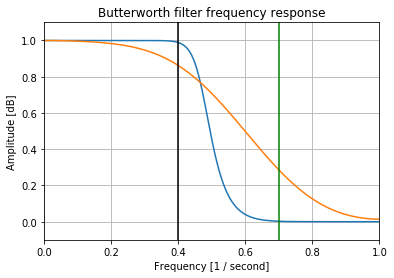

In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 4.5
#количество точек на графике
N = 10000
k = P/N
#пустые массивы значений
# X = np.array(0) 
S = np.array([])
#частота пропускания и частота заграждения
wp, ws = 0.4, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 


w=w/3.14
plt.plot(w,abs(h))
b1 = signal.firwin(len(b), 0.6, window='hamming')
w1, h1 = signal.freqz(b1)
w1=w1/3.14
plt.plot(w1,abs(h1))


plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()



## Пример неустойчивого фильтра. Устранение неустойчивости заменой одного фильтра каскадом из фильтров 2 порядка.
Разберем одно из свойств, характерное
только для БИХ-фильтров – их потенциальную неустойчивость. Она
проявляется в том, что при конечном входном сигнале получается бесконечный
отклик. Известен способ борьбы с таким эффектом –замена одного фильтра
высокого порядка каскадом из звеньев 2-го порядка


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


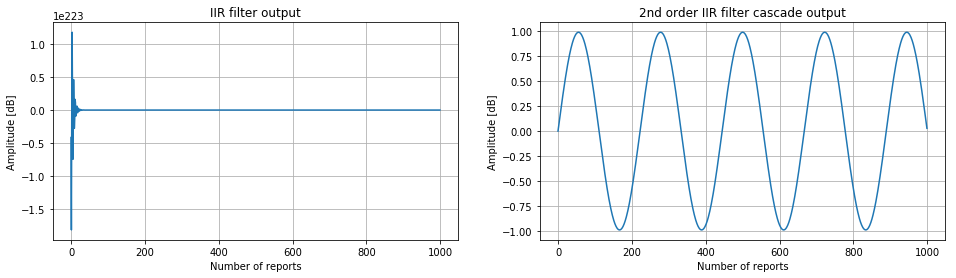

In [73]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy as np
wp, ws = 0.4, 0.7
wn = (wp+ws)/2
gpass, gstop = 0.1, 50.0
# b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='ba')
# sos = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='sos')
# b, a = signal.cheby1(50, gpass, gstop, wn, output='ba')
# sos = signal.cheby1(50, gpass, gstop, wn, output='sos')
b, a = signal.cheby1(N=50, rp=0.1, Wn=wn, btype='low', analog=False, output='ba') 
sos = signal.cheby1(N=50, rp=0.1, Wn=wn, btype='low', analog=False, output='sos')
P = 4.5
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = []
w1 = 1 #частоты сигналов

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

y_tf = signal.filtfilt(b, a, X)
y_sos = signal.sosfiltfilt(sos, X)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(y_tf)
ax1.set_title('IIR filter output')
ax1.set_xlabel('Number of reports')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(y_sos)
ax2.set_title('2nd order IIR filter cascade output')
ax2.set_xlabel('Number of reports')
ax2.set_ylabel('Amplitude [dB]')
ax2.grid(which='both', axis='both')


## Пример получения неказуальной системы при занулении отчетов спектра.
Рассмотрим пример манипуляций со спектром сигнала, которые могли бы быть
альтернативой фильтрации. Известно, что при прохождении сигнала через
фильтр, его спектр подвергается преобразованию вида:
$$ Y(e^{jw})=H(e^{jw})*X(e^{jw})  (4) $$
где Y(e
jω) – спектр выходного сигнала,
X(e
jω) – спектр входного сигнала,
H(e
jω) – частотная характеристика фильтра.
Тем самым правильно подобрав алгоритм трансформации спектра, можно
выполнить математически эквивалентное преобразование без использования
фильтрации, т.е. операций, какие заложены в разностное уравнение (3).
Вычисление коэффициентов фильтра зачастую самая сложная часть задачи
фильтрации, поэтому возникает соблазн в альтернативном способе, сводящемся
к модификации спектра согласно алгоритму (4) и вычислению сигнала из
преобразованного спектра. Однако такой подход таит опасность получения
физически неадекватного решения. Как вариант, можно получить выходной
сигнал, нарушающий принцип причинности, т.е. отклик системы будет
начинаться раньше, чем возникло воздействие. Такую систему принят называть
неказуальной.


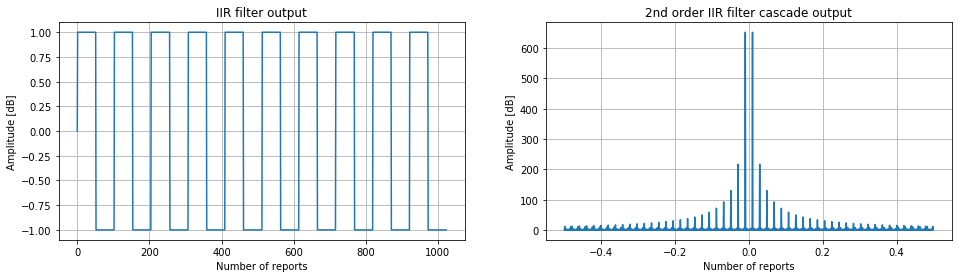

In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
XX = np.array([]) 
w1 = 1
#создание двух гармонического сигнала
for t in range(N):
    
    XX = np.append(XX, math.sin(2*math.pi*w1*t*k))

# meander = np.sign(XX)
# plt.plot(meander)
# plt.show()

S = np.fft.fft(meander)
freq = np.fft.fftfreq(N)
# plt.plot(freq, abs(S))
# plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


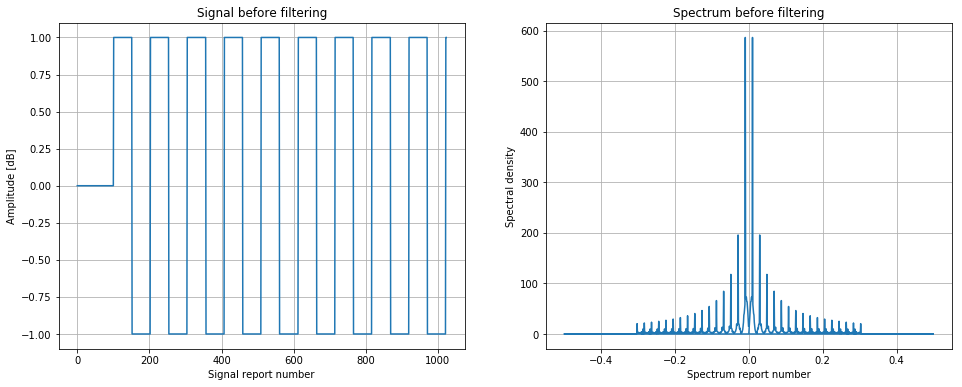

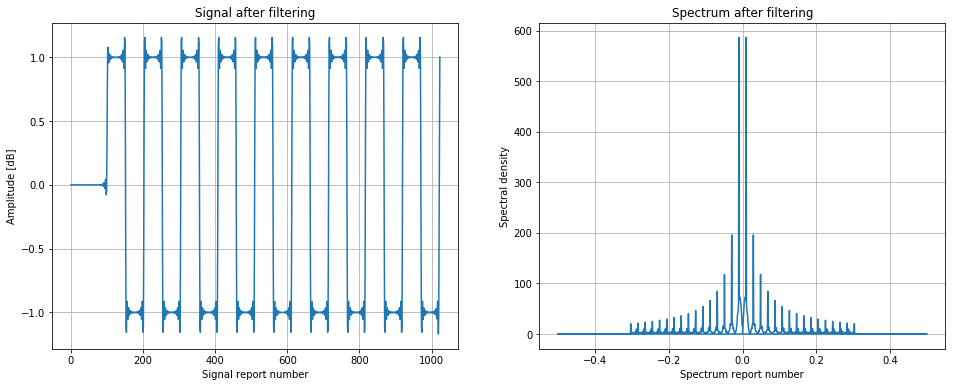

In [100]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке 
P = 10 
#количество точек на графике 
N = 1024 
k = P/N 
#пустые массивы значений 
X = np.zeros(100) 
w1 = 1 #частота сигнала 

#создание гармонического сигнала 
for t in range(N-100): 
    X = np.append(X, math.sin(2*math.pi*w1*t*k)) 
    
meandr = np.sign(X) 

S = np.fft.fft(meandr) 
freq = np.fft.fftfreq(N) 

#частота пропускания и частота заграждения
wp, ws = 0.4, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
y_tf = signal.filtfilt(b, a, meandr)

rspectr = S
rspectr[512-200:512+200] = 0

rmeandr = np.fft.ifft(rspectr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(meandr)
ax1.set_title('Signal before filtering')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(freq, abs(S))
ax2.set_title('Spectrum before filtering')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(y_tf)
ax3.set_title('Signal after filtering')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(freq, abs(rspectr))
ax4.set_title('Spectrum after filtering')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')


## Фильтрация меандра.
Несмотря на лаконичное название, упражнение будет многозначным и
поучительным. С другой стороны, оно покажет, как, используя стандартные
цифровые фильтры, избавляться от ненужных спектральных компонент. Еще
это учебный пример на понимание спектрального анализа и частотной
фильтрации.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


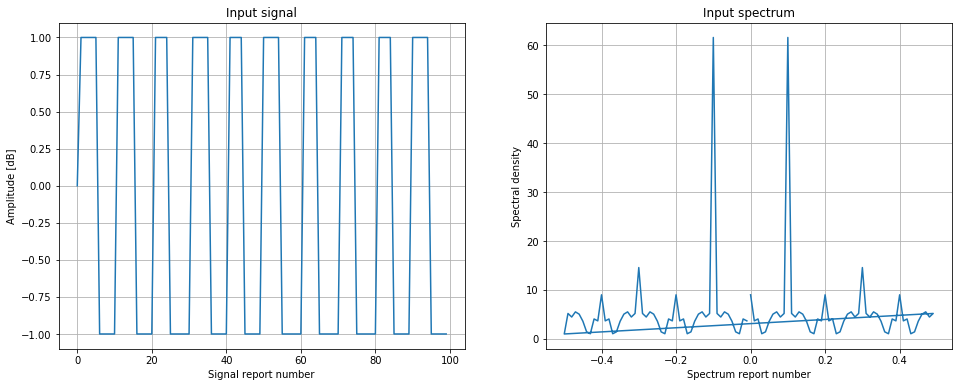

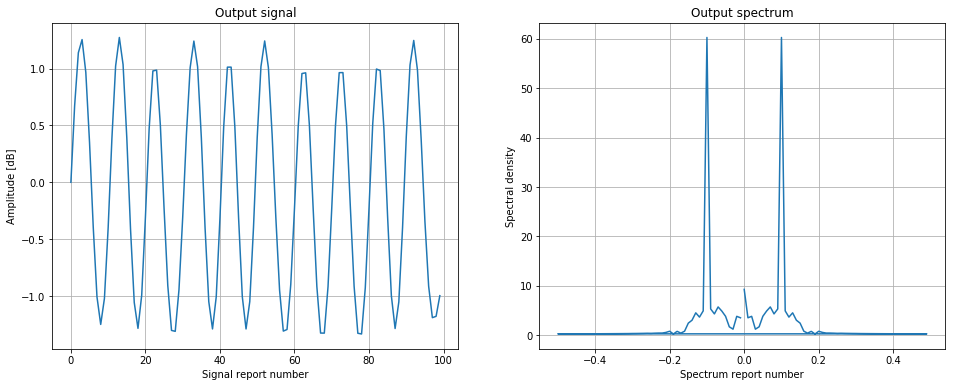

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке 
P = 10 
#количество точек на графике 
N = 100
k = P/N 
#пустые массивы значений 
X = np.zeros(0) 
w1 = 1 #частота сигнала 

#создание гармонического сигнала 
for t in range(N): 
    X = np.append(X, math.sin(2*math.pi*w1*t*k)) 
    
meandr = np.sign(X) 

S = np.fft.fft(meandr) 
freq = np.fft.fftfreq(N) 

#частота пропускания и частота заграждения
wp, ws = 0.2, 0.4
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 10.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
y_tf = signal.filtfilt(b, a, meandr)

freq = np.fft.fftfreq(N)
spectr = np.fft.fft(y_tf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(meandr)
ax1.set_title('Input signal')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(freq, abs(S))
ax2.set_title('Input spectrum')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(y_tf)
ax3.set_title('Output signal')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(freq, abs(spectr))
ax4.set_title('Output spectrum')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')


## Дополнение нулями последовательности
Это и последующие упражнения посвящены простейшим модификациям
сигнала (спектра) с отслеживанием сопутствующих изменений в спектре
(сигнале). При этом важно помнить симметрию прямого и обратного Фурьепреобразований, в результате чего можно переносить известные свойства из
спектральной области во временную, и наоборот.
Первое свойство касается дополнения нулями Фурье-образа заданной
последовательности. Рассмотрим более сложный случай, когда вставлять нули
придется в спектр действительного сигнала. Особенностью такого случая
является тот факт, что отсчеты спектра должны удовлетворять условияv [4].
$$ Re[X_{p}(k)] = Re[X_{p}(N-k)]  $$
$$ Im[X_{p}(k)] = -Im[X_{p}(N-k)] (5) $$
где  $$ X_{p}(k) – ДПФ сигнала. $$
Тем самым вставлять нули нужно так, чтобы удовлетворять этому условию. т.е.
добавлять нули попарно симметрично в обе половины спектра, в противном
случае есть риск получить после обратного преобразования комплексный
сигнал

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


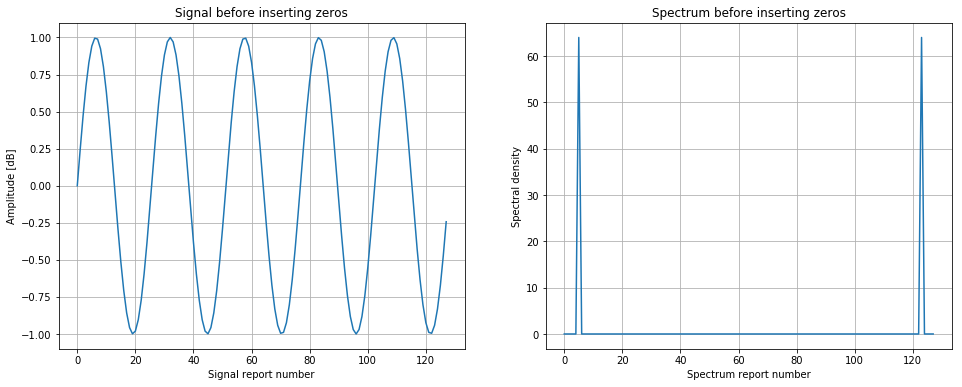

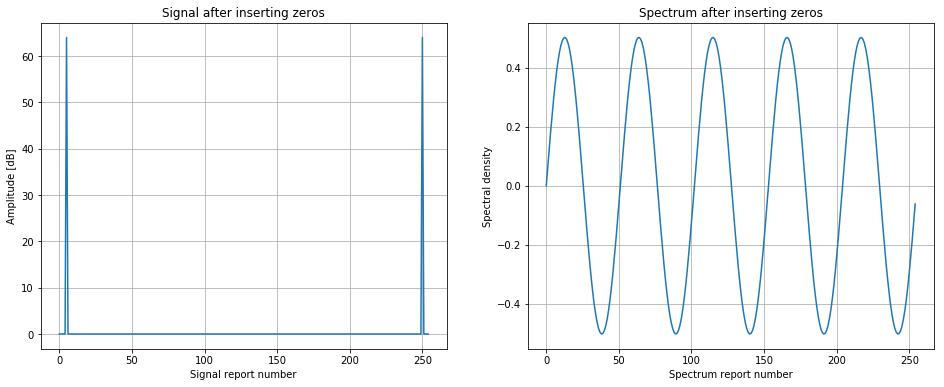

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 5
#количество точек на графике
N = 128
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
R = np.zeros(128)
SUM = np.array([])

#создание двух гармонического сигнала
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

S = np.fft.fft(X)

SUM = np.hstack((S[:63],R))
SUM1 = np.hstack((SUM,S[64:128]))

Z = np.fft.ifft(SUM1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(X)
ax1.set_title('Signal before inserting zeros')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(abs(S))
ax2.set_title('Spectrum before inserting zeros')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(abs(SUM1))
ax3.set_title('Signal after inserting zeros')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(Z)
ax4.set_title('Spectrum after inserting zeros')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')


## Децимация сигнала.
Децимацией (или прореживанием) сигнала называется процедура, когда
оставляют каждый N-ый отсчет, а остальные отбрасывают. N далее будем
называть степенью децимации. Данное упражнение является противоположным
предыдущему, в смысле того, что прореживание сигнала является обратной
операции интерполяции. И наблюдаемые эффекты также будут обратными.



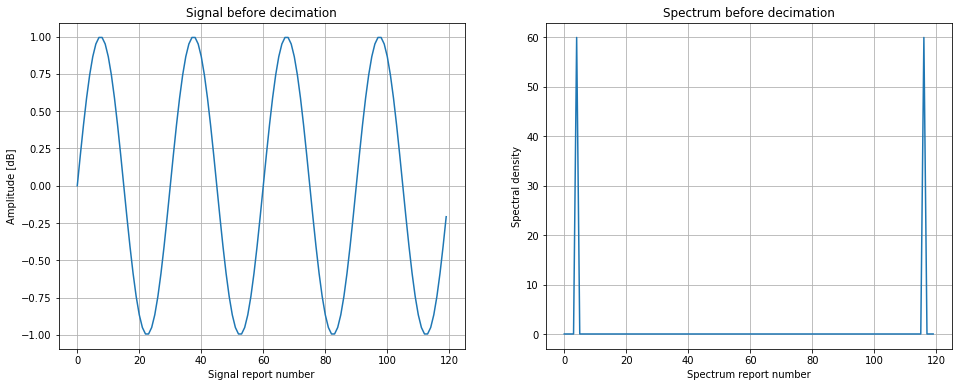

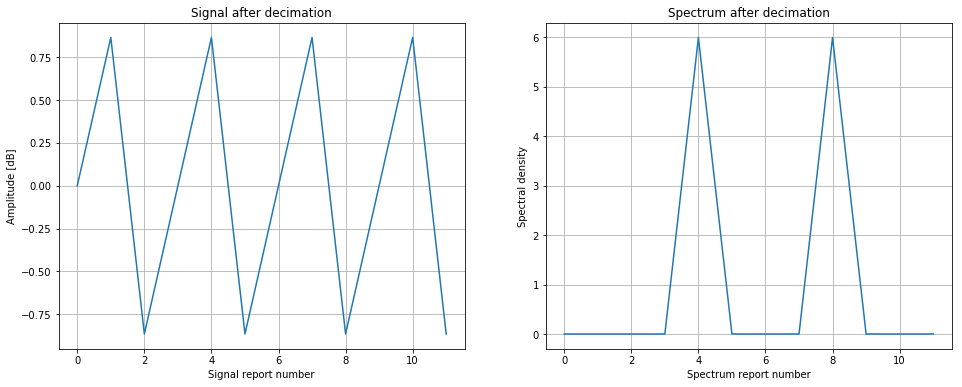

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 4
#количество точек на графике
N = 120
k = P/N
#степень децимации
d = 10;
#пустые массивы значений
X = np.array([]) 
S = np.array([])
Xd = np.array([]) 
Sd = np.array([])

#создание двух гармонического сигнала
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))

S = np.fft.fft(X)

for t in range(0,N,d):
    Xd = np.append(Xd, math.sin(2*math.pi*w1*t*k))

Sd = np.fft.fft(Xd)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(X)
ax1.set_title('Signal before decimation')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(abs(S))
ax2.set_title('Spectrum before decimation')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(Xd)
ax3.set_title('Signal after decimation')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(abs(Sd))
ax4.set_title('Spectrum after decimation')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')



## Вставка нулей между отчетами сигнала.
В данном упражнении рассмотрим еще один способ добавления нулей в сигнал
и сопутствующие изменения в спектре – мы будем добавлять нули между
отсчетами сигнала с различной периодичностью. Разумеется. при такой
операции сигнал будет сильно искажаться, но при этом любопытны будут
изменения в спектре.

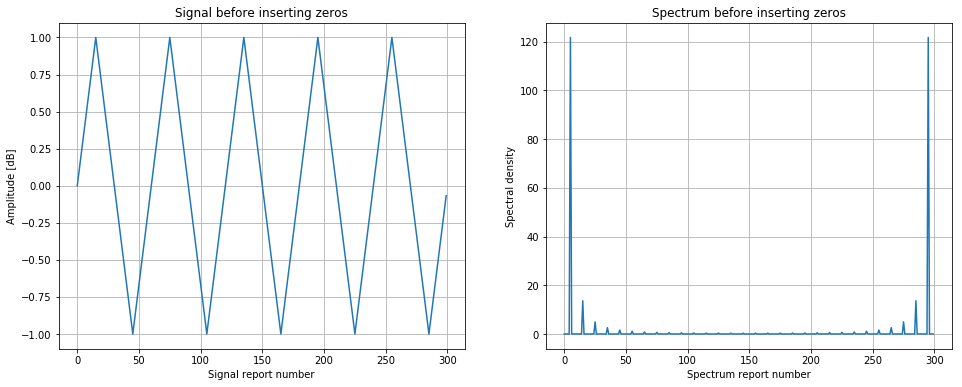

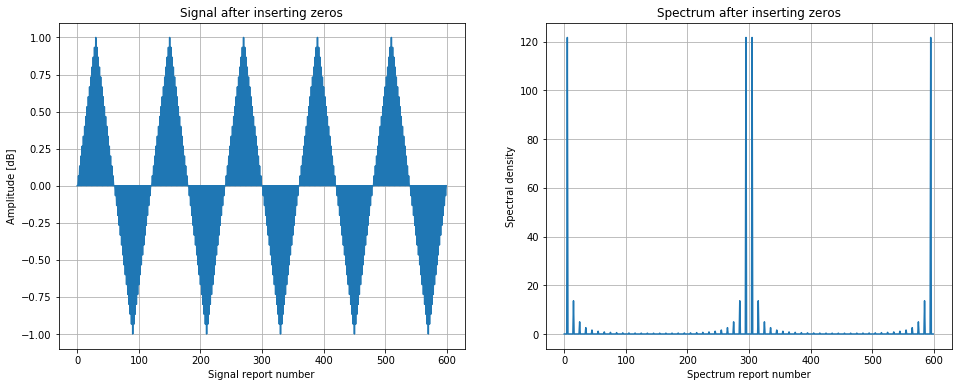

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 5
#количество точек на графике
N = 300
k = P/N
#период зануления
z = 2;
y = N*z
#пустые массивы значений
X = np.array([]) 
S = np.array([])
Xz = np.zeros(y) 
Sz = np.array([])

#функция генератора сигнала Triangle Wave
def triangle(length, amplitude): 
    section = length // 4 
    for direction in (1, -1): 
        for i in range(section): 
            yield i * (amplitude / section) * direction 
        for i in range(section): 
            yield (amplitude - (i * (amplitude / section))) * direction 
        
triangle_wave = list(triangle(N//P, 1))*P
S = np.fft.fft(triangle_wave)

Xz[::2]=triangle_wave

Sz = np.fft.fft(Xz)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(triangle_wave)
ax1.set_title('Signal before inserting zeros')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(abs(S))
ax2.set_title('Spectrum before inserting zeros')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(Xz)
ax3.set_title('Signal after inserting zeros')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(abs(Sz))
ax4.set_title('Spectrum after inserting zeros')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')



## Влияние окна на спектр дополненного нулями сигнала
Окном (оконной функцией) или весовой функцией будем называть такую
функцию w(k), на которую поточечно перемножается сигнал x(k). Спектр такого
произведения будет являться сверткой спектров сигнала и оконной функции:
$$ X(k)*W(k)    (6) $$
где X(k) и W(k) – спектры сигнала и весовой функции соответственно. В
результате вместо одного ненулевого отсчета в спектре синусоиды, получается
размазанный пик (так называемый главный лепесток) и много мелких пиков
(боковые лепестки) - результат свертки единичного импульса и спектра весовой
функции. Когда к отрезку сигналу явно не применяется окно, на самом деле это
эквивалентно использованию прямоугольного или естественного окна.
Применение других типов окон позволяет изменить спектральные
характеристики взвешенного сигнала. Это свойство мы рассмотрим в данном
упражнении. Другое применение окон – обеспечение плавного изменения
сигнала, когда это необходимо.
Важно понимать, что любой отрезок сигнала при вычислении ДПФ
периодически продолжается, и наложения окна не происходит. Однако при 
30
добавлении нулевых отсчетов (цели этой процедуры описаны в упражнении
10), возникает эффект наложения прямоугольного окна [6]



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


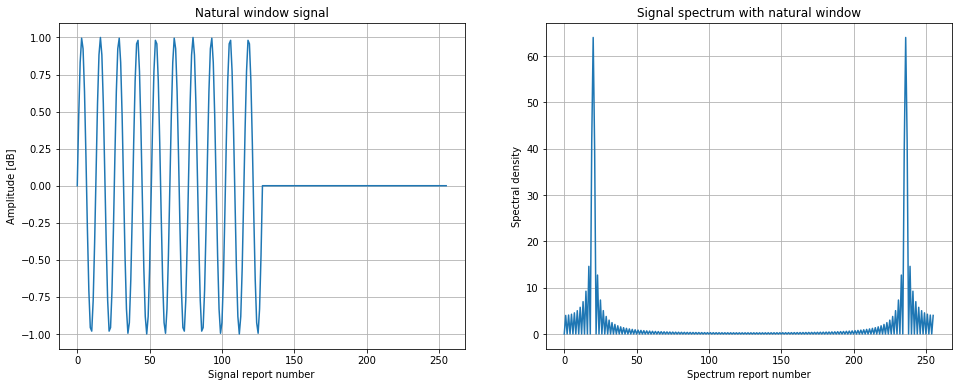

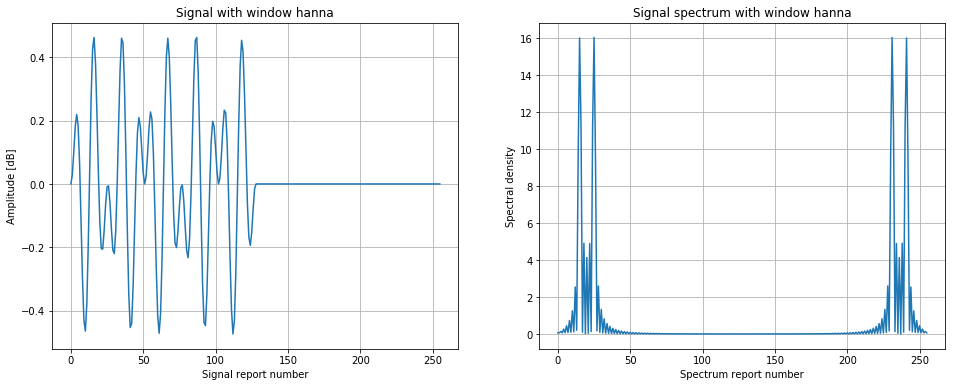

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 128
s = 32
k = P/N
#пустые массивы значений
X = np.array([])
H = np.array([])
Sx = np.array([])
Sh = np.array([])
R = np.zeros(N)
Ux = np.array([])
Uh = np.array([])


#создание гармонического сигнала
for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))


Ux = np.hstack((X[:N],R))
Sx = np.fft.fft(Ux)

#окно Ханна
for t in range(N):
    H = np.append(Z, 0.5*(1 - math.cos((2*math.pi*t)/(N-1))))
    
Uh = np.hstack((H[:N],R))


Sh = np.fft.fft(Ux*Uh)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(Ux)
ax1.set_title('Natural window signal')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(abs(Sx))
ax2.set_title('Signal spectrum with natural window')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (16,6))

ax3.plot(Ux*Uh)
ax3.set_title('Signal with window hanna')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(abs(Sh))
ax4.set_title('Signal spectrum with window hanna')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')

## Автокорреляционные функции некоторых сигналов.
В этом упражнении мы рассмотрим, какой вид принимает автокорреляционная
функция для таких сигналов как прямоугольный импульс, синусоидальный
сигнал, белый гауссов шум, линейно частотно-модулируемый (ЛЧМ) сигнал.
Автокорреляционной функцией (или последовательностью в дискретном
случае) для эргодического сигнала называется выражение вида:
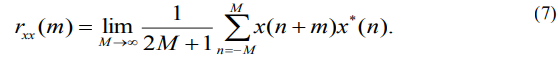
В соотношении (7) $x(n)$ - анализируемый процесс, $*$ - знак комплексного
сопряжения. Для данных с конечным числом точек приходится пользоваться
оценкой последовательности, лимитируя число слагаемых ряда в (7), для
периодических последовательностей при вычислении ограничиваются
периодом. Функция (7) будет иметь смысл количественной меры подобия
сигнала и его смещенной копии, величина смещения будет задаваться
значением аргумента m. 


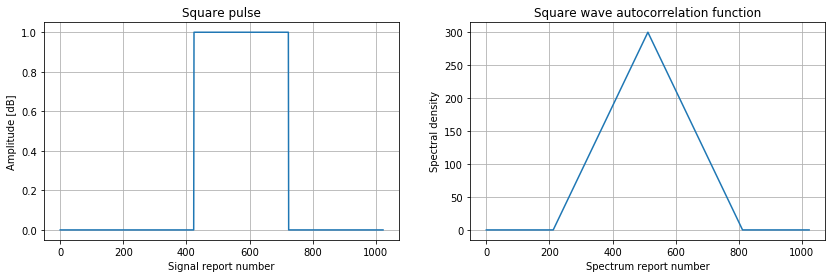

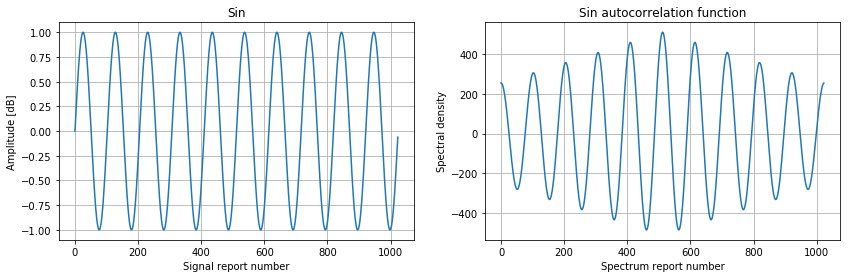

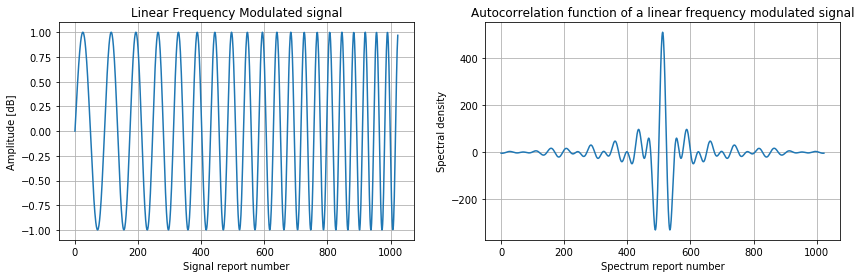

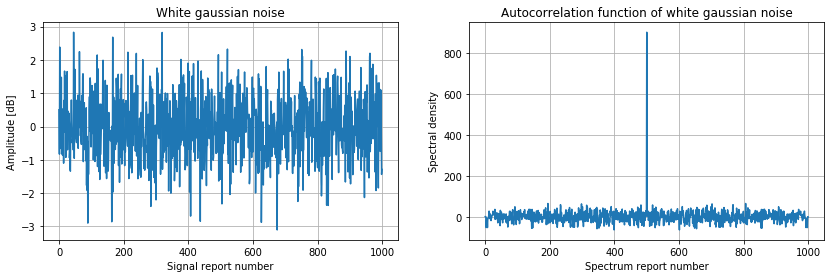

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке 
P =10
#количество точек на графике 
N = 1024
k = P/N 
#пустые массивы значений
SIN = np.array([])
LFM = np.array([])
NOISE = np.array([])
PULSE = np.zeros(N)
ACFSIN = np.array([])
ACFLFM = np.array([])
ACFNOISE = np.array([])
ACFPULSE = np.array([])


w1 = 1 #частота сигнала 

for t in range(N):
    SIN = np.append(SIN, math.sin(2*math.pi*w1*t*k))
    
for t in range(N):
    LFM = np.append(LFM, math.sin(2*math.pi*w1*t*k))
    w1=w1+0.001

PULSE[N-600:N-300:] = 1

NOISE = np.random.normal(0, 1, 1000)

ACFSIN = np.correlate(SIN,SIN,mode='same')
ACFLFM = np.correlate(LFM,LFM,mode='same')
ACFNOISE = np.correlate(NOISE,NOISE,mode='same')
ACFPULSE = np.correlate(PULSE,PULSE,mode='same')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.plot(PULSE)
ax1.set_title('Square pulse')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(ACFPULSE)
ax2.set_title('Square wave autocorrelation function')
ax2.set_xlabel('Spectrum report number')
ax2.set_ylabel('Spectral density')
ax2.grid(which='both', axis='both')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (14,4))

ax3.plot(SIN)
ax3.set_title('Sin')
ax3.set_xlabel('Signal report number')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

ax4.plot(ACFSIN)
ax4.set_title('Sin autocorrelation function')
ax4.set_xlabel('Spectrum report number')
ax4.set_ylabel('Spectral density')
ax4.grid(which='both', axis='both')

fig, (ax5, ax6) = plt.subplots(1, 2, figsize = (14,4))

ax5.plot(LFM)
ax5.set_title('Linear Frequency Modulated signal')
ax5.set_xlabel('Signal report number')
ax5.set_ylabel('Amplitude [dB]')
ax5.grid(which='both', axis='both')

ax6.plot(ACFLFM)
ax6.set_title('Аutocorrelation function of a linear frequency modulated signal')
ax6.set_xlabel('Spectrum report number')
ax6.set_ylabel('Spectral density')
ax6.grid(which='both', axis='both')

fig, (ax7, ax8) = plt.subplots(1, 2, figsize = (14,4))

ax7.plot(NOISE)
ax7.set_title('White gaussian noise')
ax7.set_xlabel('Signal report number')
ax7.set_ylabel('Amplitude [dB]')
ax7.grid(which='both', axis='both')

ax8.plot(ACFNOISE)
ax8.set_title('Autocorrelation function of white gaussian noise')
ax8.set_xlabel('Spectrum report number')
ax8.set_ylabel('Spectral density')
ax8.grid(which='both', axis='both')


## Выделение сложного сигнала в шуме при помощи взаимнокорреляционной функции (ВКФ).
В данном упражнении рассмотрим пример применения корреляционных
свойств на практической задаче: обнаружение наличия и местоположения
сложного сигнала в белом гауссовом шуме.
В этом упражнении ключевым понятием будет взаимокорреляционная функция
(ВКФ) или последовательность для дискретного случая. Для эргодического
сигнала таковой называется выражение вида :
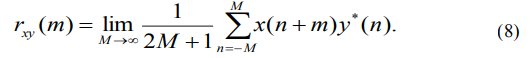
В выражении (8) $x(n)$, $y(n)$ - анализируемые процессы, $*$ - знак комплексного
сопряжения. Выражение (8) будет иметь смысл количественной меры подобия
первого сигнала $x(n)$ и его смещенного второго $y(n)$, величина смещения будет
задаваться значением аргумента $m$. 


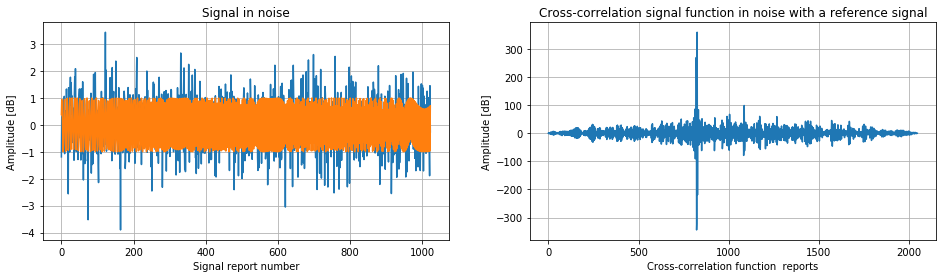

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке 
P =100
#количество точек на графике 
N = 1024
k = P/N
step = 400
#пустые массивы значений
LFM = np.array([])
LFMs = np.array([])
S = np.array([])
SUM = np.array([])
ACFSUM = np.array([])

w1 = 1 #частота сигнала 
w2 = 1
   
for t in range(N):
    LFM = np.append(LFM, math.sin(2*math.pi*w1*t*k))
    w1=w1+0.001
    
for t in range(step,N+step):
    LFMs = np.append(LFMs, math.sin(2*math.pi*w2*t*k))
    w2=w2+0.001

S = np.random.normal(0, 1, N)

SUM = LFMs + S
ACFSUM = np.correlate(SUM,LFM,mode='full')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(S)
ax1.plot(LFMs)
ax1.set_title('Signal in noise')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(ACFSUM)
ax2.set_title('Cross-correlation signal function in noise with a reference signal')
ax2.set_xlabel('Cross-correlation function  reports')
ax2.set_ylabel('Amplitude [dB]')
ax2.grid(which='both', axis='both')


## Сравнение автокорреляции и свертки.Использование свертки для нахождения «зеркальных» сигналов.
В этом упражнении рассмотрим похожую на корреляционные
функции (7) и (8) функцию свертки:
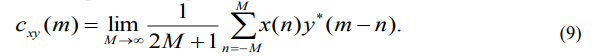
В выражении (9) $x(n)$, $y(n)$ - анализируемые процессы, $*$ - знак комплексного
сопряжения. Если $x(n)= y(n)$, то речь идет об автосвертке, в противном случае -
о взаимной. Формально отличие этих функций всего лишь в обращении
аргумента времени у второго множителя, однако влечет значительное
изменение свойств, одно из которых рассмотрим в данном упражнении: какой
эффект теряется, и как это можно использовать


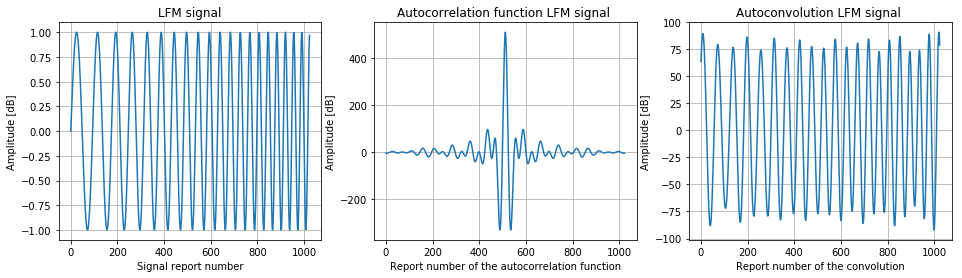

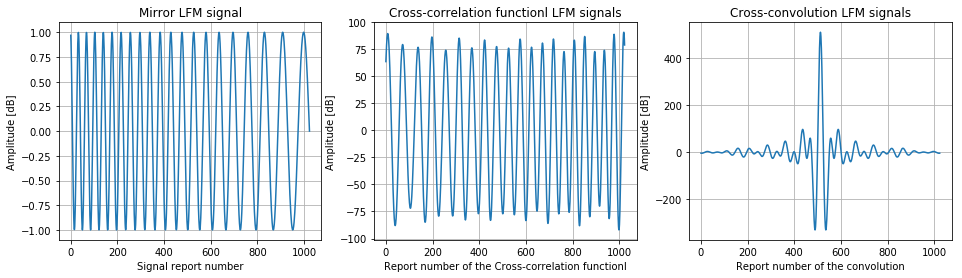

In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt

#число периодов на отрезке 
P =10
#количество точек на графике 
N = 1024
k = P/N
#пустые массивы значений
LFM = np.array([])
ACFLFM = np.array([])
CLFM = np.array([])
ACFLFMmirror = np.array([])
CLFMmirror = np.array([])

w1 = 1 #частота сигнала 
   
for t in range(N):
    LFM = np.append(LFM, math.sin(2*math.pi*w1*t*k))
    w1=w1+0.001

ACFLFM = np.correlate(LFM,LFM,mode='same')
CLFM = np.convolve (LFM,LFM,mode='same')

ACFLFMmirror = np.correlate(LFM,LFM[::-1],mode='same')
CLFMmirror = np.convolve (LFM,LFM[::-1],mode='same')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,4))

ax1.plot(LFM)
ax1.set_title('LFM signal')
ax1.set_xlabel('Signal report number')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid(which='both', axis='both')

ax2.plot(ACFLFM)
ax2.set_title('Autocorrelation function LFM signal ')
ax2.set_xlabel('Report number of the autocorrelation function')
ax2.set_ylabel('Amplitude [dB]')
ax2.grid(which='both', axis='both')

ax3.plot(CLFM)
ax3.set_title('Autoconvolution LFM signal ')
ax3.set_xlabel('Report number of the convolution')
ax3.set_ylabel('Amplitude [dB]')
ax3.grid(which='both', axis='both')

fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize = (16,4))

ax4.plot(LFM[::-1])
ax4.set_title('Mirror LFM signal')
ax4.set_xlabel('Signal report number')
ax4.set_ylabel('Amplitude [dB]')
ax4.grid(which='both', axis='both')

ax5.plot(ACFLFMmirror)
ax5.set_title('Cross-correlation functionl LFM signals')
ax5.set_xlabel('Report number of the Cross-correlation functionl')
ax5.set_ylabel('Amplitude [dB]')
ax5.grid(which='both', axis='both')

ax6.plot(CLFMmirror)
ax6.set_title('Cross-convolution LFM signals')
ax6.set_xlabel('Report number of the convolution')
ax6.set_ylabel('Amplitude [dB]')
ax6.grid(which='both', axis='both')

## Особенности фильтра Баттерворта
Для фильтров Баттерворта характерна монотонная АЧХ, Он не имеет
волнистости ни в области пропускания, ни в области режекции. Благодаря
отсутствию волнистости, его называют максимально плоским фильтром, у него нет
нулей частотной характеристики в полосе пропускания и режекции.
Частотная характеристика аналогового эквивалента фильтра Баттерворта
описывается выражением :
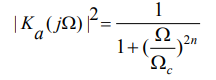
Где $n$ – порядок фильтра, $Ω_{с}$ – частота среза

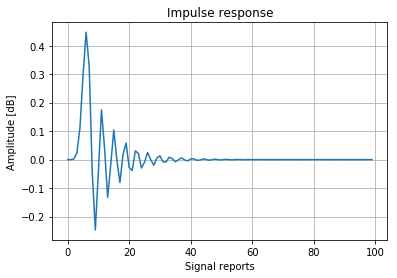

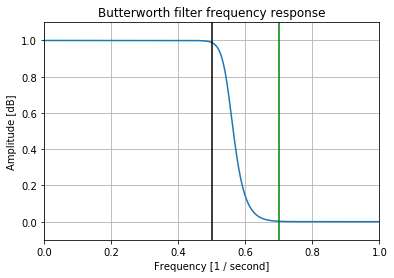

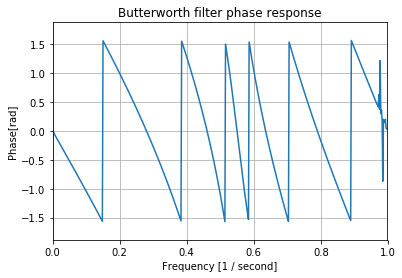

In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
Z = np.zeros(100)
Z[2]=1
#частота пропускания и частота заграждения
wp, ws = 0.5, 0.7
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0 #максимальные потери в полосе пропускания и минимальные ослабление сигнала в ненужной полосе
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

imp = signal.lfilter(b,a,Z)

plt.plot(imp)
plt.title('Impulse response')
plt.xlabel('Signal reports')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

w=w/3.14

plt.plot(w, abs(h))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Butterworth filter phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

## Особенности фильтра Чебышева I типа.
Фильтры Чебышева имеют меньшую
переходную область, чем фильтры Баттерворта того же порядка. Однако это
достоинство фильтра Чебышева получается ценой волнистости в области
пропускания. Частотные характеристики фильтра Чебышева имеют эквивалентные по
волнистости характеристики в области пропускания (все волны в полосе фильтра
имеют одинаковую величину), монотонно спадающую характеристику в области
режекции, и более крутой спад в переходной области по сравнению с фильтром
Баттерворта того же порядка .
Квадрат частотной характеристики аналогового эквивалента фильтра
Чебышева описывается выражением :
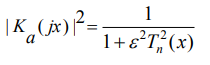
где $x = Ω/ Ω_{p}$ - частота, нормированная к частоте среза Ω_{p} , а T_{n} - полином
Чебышева n -го порядка, по определению равный
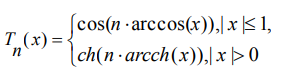
- параметр, ограничивающий амплитуду пульсаций

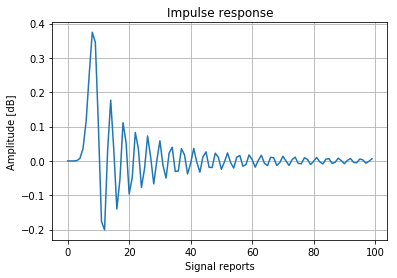

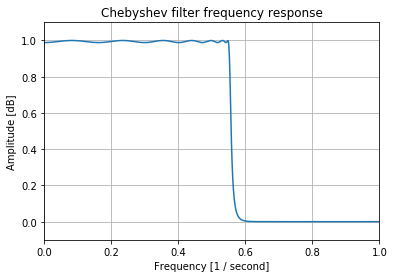

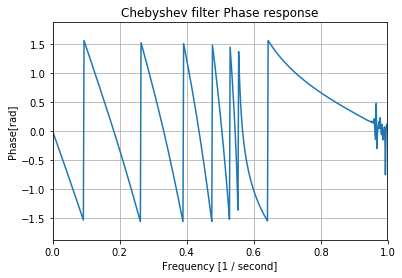

In [53]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy as np

Z = np.zeros(100)
Z[2]=1

wp, ws = 0.4, 0.7
wn = (wp+ws)/2
gpass, gstop = 0.1, 50.0
# b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='ba')
# sos = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='sos')
# b, a = signal.cheby1(50, gpass, gstop, wn, output='ba')
# sos = signal.cheby1(50, gpass, gstop, wn, output='sos')
b, a = signal.cheby1(N=14, rp=0.1, Wn=wn, btype='low') 
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

imp = signal.lfilter(b,a,Z)

plt.plot(imp)
plt.title('Impulse response')
plt.xlabel('Signal reports')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

w=w/3.14
plt.plot(w, abs(h))
# 20 * np.log10(
# plt.plot(w, abs(h))
# plt.plot(w,abs(h))

plt.title('Сhebyshev filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Сhebyshev filter Phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

## Особенности фильтра Чебышева II типа.(инверсного Чебышева)
Инверсный фильтр Чебышева или фильтр Чебышева II типа,
схож с обычным фильтром Чебышева за исключением того, что он имеет
волнистость в области режекции и максимально плоскую характеристику в
полосе пропускания. Для данного типа фильтров вы можете указать величину
ослабления (в дБ) в области режекции фильтра. Частотная характеристика
фильтров Чебышева П типа имеет одинаковое по волнистости (эквиволнистое)
значение в области режекции, монотонно убьюающую величину отклика в
области пропускания и более крутой спад, чем у фильтров Баттерворта того же
порядка. Одно из преимуществ фильтров Чебышева П типа над обычными
фильтрами Чебышева состоит в том, что фильтры Чебышева П типа имеют
волнистость в области режекции, а не в полосе пропускания [7].
Квадрат частотной характеристики аналогового эквивалента фильтра
Чебышева II типа описывается выражением [8]:
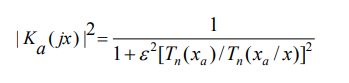
где $ x = Ω/ Ω_{p} $- частота, нормированная к частоте среза $ Ω_{p}$ , $ x_{a}$- граничная частота
полосы непропускания, $T_{n}$  - полином Чебышева n -го порядка, по определению
равный
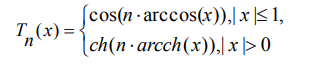
 - параметр, ограничивающий амплитуду пульсаций

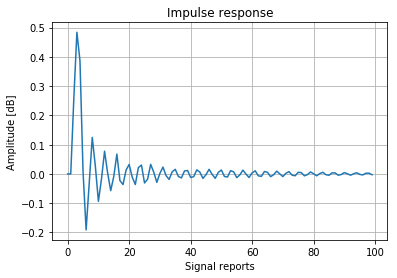

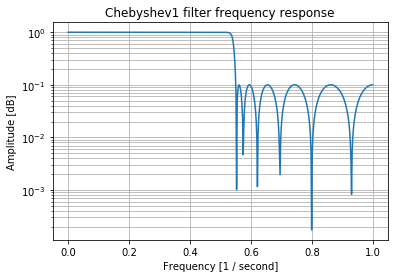

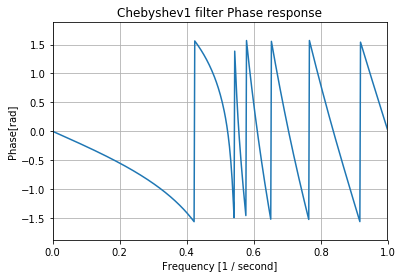

In [54]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy as np

Z = np.zeros(100)
Z[2]=1

wp, ws = 0.4, 0.7
wn = (wp+ws)/2
gpass, gstop = 0.1, 50.0
# b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='ba')
# sos = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='cheby1', output='sos')
# b, a = signal.cheby1(50, gpass, gstop, wn, output='ba')
# sos = signal.cheby1(50, gpass, gstop, wn, output='sos')
b, a = signal.cheby2(N=12, rs=20, Wn=wn, btype='low') 
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

imp = signal.lfilter(b,a,Z)

plt.plot(imp)
plt.title('Impulse response')
plt.xlabel('Signal reports')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

w=w/3.14
plt.semilogy(w, abs(h))
# 20 * np.log10(
# plt.plot(w, abs(h))
# plt.plot(w,abs(h))

plt.title('Сhebyshev1 filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Сhebyshev1 filter Phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

## Особенности эллиптических фильтров 
Эллиптические фильтры распределяют волнистость между областью
пропускания и областью режекции. Частотную характеристику эллиптических
фильтров характеризует эквиволнистость (равноволнистость) полосы пропускания и
режекции. По сравнению с фильтрами Баттерворта и Чебышева того же порядка,
эллиптические фильтры обеспечивают самую крутую переходную область между
ПП и ПР. Вследствие этого эллиптические фильтры довольно популярны в тех
приложениях, где требуется небольшая переходная область и допускается
волнистость. Можно отметить резкий край переходной области эллиптических
фильтров даже низкого порядка. Для эллиптических фильтров, как правило, вы
можете указать величину волнистости (в дБ) в полосе пропускания, а так же
величину ослабления (в дБ) в полосе режекции [7].
Квадрат частотной характеристики аналогового эквивалента
эллиптического фильтра описывается выражением [8]:
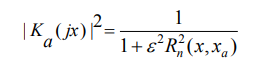
где $x = Ω/ Ω_{p}$ - частота, нормированная к частоте среза,
$x_{a}$- граничная частота полосы непропускания,
 - параметр, ограничивающий амплитуду пульсаций,
$R(x, x_{a})$ - эллиптическая функция Якоби

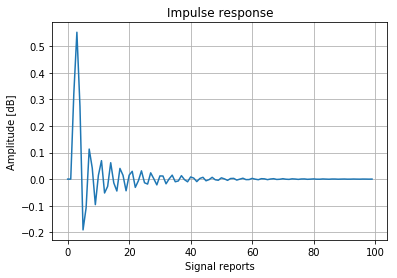

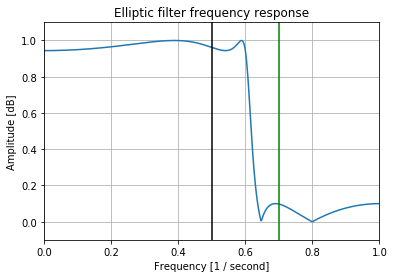

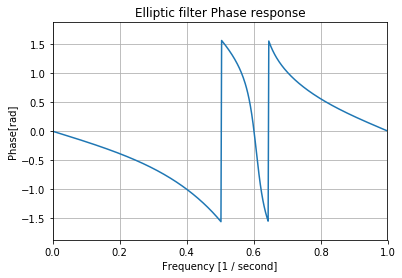

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
Z = np.zeros(100)
Z[2]=1
#частота пропускания и частота заграждения
wp, ws = 0.5, 0.7
n=4   #Порядок фильтра
wn = (wp+ws)/2
rp = 0.5 #Максимально допустимая пульсация ниже единицы усиления в полосе пропускания.
rs = 20 #Минимальное затухание, требуемое в полосе останова

b, a = signal.ellip(n, rp, rs, wn, 'low')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

imp = signal.lfilter(b,a,Z)

plt.plot(imp)
plt.title('Impulse response')
plt.xlabel('Signal reports')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

w=w/3.14
plt.plot(w, abs(h))
# 20 * np.log10(
# plt.plot(w, abs(h))
# plt.plot(w,abs(h))

plt.title('Elliptic filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green') # cutoff frequency
plt.axvline(wp, color='black')
plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Elliptic filter Phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
# plt.axvline(ws, color='green') # cutoff frequency
# plt.axvline(wp, color='black')
plt.show()

## Особенности фильтра Бесселя
Как и фильтр Баттерворта, фильтр Бесселя обладает монотонной
АЧХ и в полосе пропускания, и в полосе режекции. С тем же самым порядком
фильтр Бесселя имеет гораздо большее ослабление в полосе режекции, чем фильтр
Баттерворта. По сравнению с другими фильтрами того же порядка фильтр Бесселя
имеет самую широкую переходную область. Главным преимуществом фильтра
Бесселя является практически идеальная линейность фазово-частотной характеристики
в полосе пропускания [7]. Фильтр нижних частот Бесселя п-го порядка
характеризуется передаточной функцией
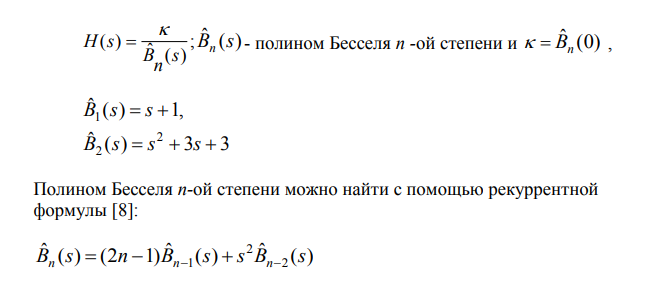

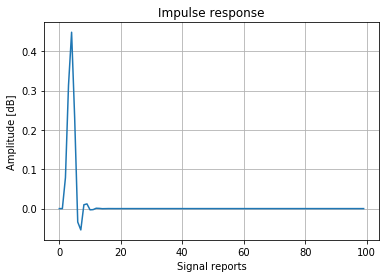

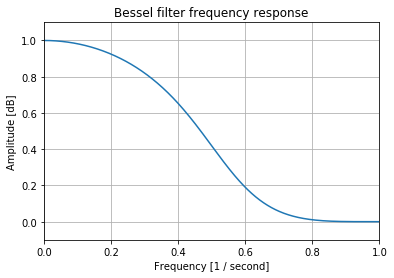

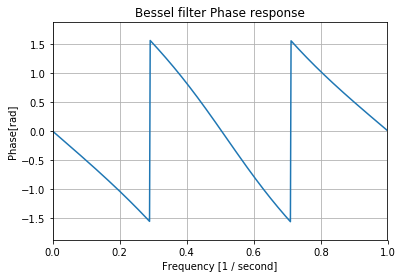

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
Z = np.zeros(100)
Z[2]=1
#частота пропускания и частота заграждения
wp, ws = 0.5, 0.7
n=4   #Порядок фильтра
wn = (wp+ws)/2
rp = 0.5 #Максимально допустимая пульсация ниже единицы усиления в полосе пропускания.
rs = 20 #Минимальное затухание, требуемое в полосе останова

b, a = signal.iirfilter(n, rp, rs, wn, 'low',ftype='bessel')
w, h = signal.freqz(b, a) #вычисление частотной характеристики 

imp = signal.lfilter(b,a,Z)

plt.plot(imp)
plt.title('Impulse response')
plt.xlabel('Signal reports')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

w=w/3.14
plt.plot(w, abs(h))
# 20 * np.log10(
# plt.plot(w, abs(h))
# plt.plot(w,abs(h))

plt.title('Bessel filter frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))

plt.title('Bessel filter Phase response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Phase[rad]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
# plt.axvline(ws, color='green') # cutoff frequency
# plt.axvline(wp, color='black')
plt.show()